In [1]:
import numpy as np
import pandas as pd
from collections import Counter, defaultdict
import re

from nltk.tokenize import word_tokenize, wordpunct_tokenize, RegexpTokenizer

from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from scipy.sparse import csr_matrix
from sklearn.decomposition import PCA

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from os import path
#from PIL import image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from keras.models import Sequential
from keras import layers

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
sns.set(font_scale=1.3)



[nltk_data] Downloading package punkt to
[nltk_data]     /Users/josephttustin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/josephttustin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/josephttustin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Using TensorFlow backend.


In [2]:
df=pd.read_csv("data/rotten_tomatoes_reviews.csv")
df_quick = df[:10000]
df_quick
doi=df_quick["Review"].values
df_quick


Freshness                                             Review
0             1   Manakamana doesn't answer any questions, yet ...
1             1   Wilfully offensive and powered by a chest-thu...
2             0   It would be difficult to imagine material mor...
3             0   Despite the gusto its star brings to the role...
4             0   If there was a good idea at the core of this ...
5             0   Gleeson goes the Hallmark Channel route, dama...
6             1   It was the height of satire in 1976: dark as ...
7             0   Everyone in "The Comedian" deserves a better ...
8             0   Actor encourages grumpy Christians to embrace...
9             1          Slight, contained, but ineffably soulful.
10            1   Bell's debut feature addresses its subject wi...
11            1   ... except for its shamelessly (and irresisti...
12            0   This is not one for the uninitiated. It's als...
13            1   Son of Saul employs the formal mechanics of f...
14            0   It isn't thrilling. Fox can't act. The backch...
15            0   Hiddleston and Swinton are lovely to watch, b...
16            1   Yossi is a stronger film than its predecessor...
17            1   I feel like a Sparkle Baby just puked rainbow...
18            0                              Long, unfocused film.
19            1   Kubo and the Two Strings is better than immer...
20            0   Easy to enjoy, if you're at all susceptible t...
21            1   An extraordinary blast from the past, X-Men: ...
22            1   Mostly lightweight, but the most interesting ...
23            1   Drawn, per a disclaimer, from period accounts...
24            1   ... hones its dramatic elements to emotional ...
25            0   What seemed like a decent idea - a fourth and...
26            0   Free Birds is unappealingly staged and paced ...
27            0   A joyless, misanthropic 105 minutes worth of ...
28            0   This one, directed by John Glen, just follows...
29            1   The movie is purely visceral, generating adre...
...         ...                                                ...
9970          0   There's nothing worthwhile about a single mom...
9971          0   The story stagnates with the null drawing of ...
9972          1   Writer/director Paul Thomas Anderson's period...
9973          0   The only reasons to see this structurally mes...
9974          0   I've never seen Kristen Bell more unlikable a...
9975          0   Mann seems undecided about what he wants Enem...
9976          0   Gigi is dressed to kill, but if all the Frenc...
9977          1   Tells a specifically Chinese story, and yet i...
9978          0   Man of Steel starts feeling like just another...
9979          0   The sex was good but the delirious lesbian mu...
9980          1   There is so much attention to detail, it's ge...
9981          1   While none of it's anything particularly spec...
9982          1   Hayek and Lithgow are outstanding in their le...
9983          0   [VIDEO ESSAY] Indolent pacing combines with t...
9984          0   The least fun of the three: overworked and un...
9985          1   Extremely original masterpiece in British cinema
9986          1   The pugnacious John C. is gifted and knows no...
9987          1   Saoirse Ronan plays this interior drama with ...
9988          1   Karolina Gruszka is very good as Curie, conve...
9989          1   An altogether astonishing film, not in the le...
9990          0   Scott's film can't quite decide whether it's ...
9991          1   More than just a not-so-instant replay...even...
9992          1   Screenwriter Rebecca Frayn's full feature deb...
9993          0   The cast adds little. Columbus Short, a dance...
9994          1   But the film's fascination lies less in its p...
9995          0   Can a video game turn a movie into a hit, man...
9996          0   If you swallow this type of thing no matter w...
9997          1   It all escalates into an arch, know

In [3]:
count_vect = CountVectorizer(lowercase=True, tokenizer=None, strip_accents= "ascii", stop_words='english',
                             analyzer='word', max_df=1.0, min_df=2,
                             max_features=10000)
count_vect.fit(df_quick.Review.values)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=10000, min_df=2,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents='ascii', token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [4]:
feature_names = count_vect.get_feature_names()
feature_names

['10',
 '100',
 '101',
 '105',
 '11',
 '110',
 '118',
 '12',
 '120',
 '13',
 '130',
 '14',
 '1408',
 '15',
 '150',
 '17th',
 '18',
 '1930s',
 '1940s',
 '1950',
 '1950s',
 '1955',
 '1959',
 '1960',
 '1960s',
 '1961',
 '1970s',
 '1971',
 '1974',
 '1976',
 '1978',
 '1979',
 '1980',
 '1980s',
 '1981',
 '1984',
 '1985',
 '1988',
 '1990',
 '1990s',
 '1991',
 '1996',
 '1998',
 '1999',
 '19th',
 '20',
 '200',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2049',
 '20s',
 '21',
 '21st',
 '22',
 '24',
 '25',
 '27',
 '28',
 '2u',
 '30',
 '300',
 '3000',
 '33',
 '35',
 '3d',
 '3dd',
 '40',
 '40s',
 '45',
 '47',
 '50',
 '500',
 '50s',
 '50th',
 '52',
 '55',
 '60',
 '60s',
 '65',
 '68',
 '70',
 '70s',
 '76',
 '77',
 '79',
 '80',
 '80s',
 '81',
 '82',
 '85',
 '86',
 '90',
 '90s',
 '93',
 '95',
 '96',
 '98',
 '99',
 'aardman',
 'aaron',
 'abandon',
 'abandoned',
 'abdul',
 'abe

In [5]:
for key in sorted(count_vect.vocabulary_.keys()):
    print("{0:<20s} {1}".format(key, count_vect.vocabulary_[key]))

10                   0
100                  1
101                  2
105                  3
11                   4
110                  5
118                  6
12                   7
120                  8
13                   9
130                  10
14                   11
1408                 12
15                   13
150                  14
17th                 15
18                   16
1930s                17
1940s                18
1950                 19
1950s                20
1955                 21
1959                 22
1960                 23
1960s                24
1961                 25
1970s                26
1971                 27
1974                 28
1976                 29
1978                 30
1979                 31
1980                 32
1980s                33
1981                 34
1984                 35
1985                 36
1988                 37
1990                 38
1990s                39
1991                 40
1996                 41
19

depth                2448
depths               2449
derails              2450
deranged             2451
derby                2452
derisive             2453
derivative           2454
derived              2455
derives              2456
derrickson           2457
derring              2458
descend              2459
descendants          2460
descends             2461
descent              2462
described            2463
describes            2464
description          2465
desert               2466
deserted             2467
deserve              2468
deserved             2469
deserves             2470
deserving            2471
design               2472
designed             2473
designs              2474
desire               2475
desired              2476
desires              2477
desolate             2478
desolation           2479
despair              2480
desperate            2481
desperately          2482
desperation          2483
despicable           2484
despite              2485
despot      

labute               4948
labyrinth            4949
laced                4950
lack                 4951
lacked               4952
lacking              4953
lackluster           4954
lacklustre           4955
lacks                4956
laconic              4957
lad                  4958
laden                4959
ladies               4960
ladles               4961
lady                 4962
laid                 4963
lake                 4964
lame                 4965
lament               4966
lampoon              4967
lampooned            4968
lampooning           4969
land                 4970
landing              4971
landmark             4972
landon               4973
lands                4974
landscape            4975
landscapes           4976
lane                 4977
lang                 4978
langdon              4979
language             4980
languages            4981
languid              4982
languor              4983
lap                  4984
lapels               4985
lara        

puerile              6947
pugh                 6948
pugnacious           6949
pull                 6950
pulled               6951
pulling              6952
pulls                6953
pulp                 6954
pulpy                6955
pulse                6956
pummels              6957
pumped               6958
pumps                6959
pun                  6960
punch                6961
punches              6962
punching             6963
punchlines           6964
punchy               6965
punctuated           6966
pungent              6967
punisher             6968
punishing            6969
punishment           6970
punk                 6971
puns                 6972
puny                 6973
pure                 6974
purely               6975
purgatory            6976
purge                6977
purity               6978
purple               6979
purports             6980
purpose              6981
purposefully         6982
pursuing             6983
pursuit              6984
purvis      

tiresome             9009
tiring               9010
titan                9011
titanic              9012
titans               9013
titillation          9014
title                9015
titled               9016
titular              9017
tm                   9018
today                9019
todd                 9020
toddler              9021
toddlers             9022
toe                  9023
togetherness         9024
toilet               9025
tokyo                9026
told                 9027
tolerable            9028
tolerance            9029
tolerant             9030
tolerate             9031
tolkien              9032
toll                 9033
tom                  9034
tomahawk             9035
tomb                 9036
tommy                9037
tomorrowland         9038
ton                  9039
tonal                9040
tonally              9041
tone                 9042
toned                9043
tones                9044
tongue               9045
tonight              9046
tons        

In [6]:
X_train_counts = count_vect.transform(df_quick["Review"].values)  ##bag of words
print("The type of X_train_counts is {0}.".format(type(X_train_counts)))
print("The X matrix has {0} rows (documents) and {1} columns (words).".format(
        X_train_counts.shape[0], X_train_counts.shape[1]))

scaler = StandardScaler()
X_temp = X_train_counts.toarray()
X_train_std = scaler.fit_transform(X_temp)
X_train_std



The type of X_train_counts is <class 'scipy.sparse.csr.csr_matrix'>.
The X matrix has 10000 rows (documents) and 10000 columns (words).


array([[-0.04816831, -0.03744279, -0.01414355, ..., -0.01414355,
        -0.01414355, -0.01732311],
       [-0.04816831, -0.03744279, -0.01414355, ..., -0.01414355,
        -0.01414355, -0.01732311],
       [-0.04816831, -0.03744279, -0.01414355, ..., -0.01414355,
        -0.01414355, -0.01732311],
       ...,
       [-0.04816831, -0.03744279, -0.01414355, ..., -0.01414355,
        -0.01414355, -0.01732311],
       [-0.04816831, -0.03744279, -0.01414355, ..., -0.01414355,
        -0.01414355, -0.01732311],
       [-0.04816831, -0.03744279, -0.01414355, ..., -0.01414355,
        -0.01414355, -0.01732311]])

In [8]:
count_vect2 = CountVectorizer(lowercase=True, tokenizer=None, ngram_range=(1,2),strip_accents= "ascii", stop_words='english',
                             analyzer='word', max_df=1.0, min_df=2,
                             max_features=50000)
count_vect2.fit(df_quick.Review.values)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=50000, min_df=2,
                ngram_range=(1, 2), preprocessor=None, stop_words='english',
                strip_accents='ascii', token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [9]:
feature_names2 = count_vect2.get_feature_names()
len(feature_names2)

16335

In [10]:
for key in sorted(count_vect2.vocabulary_.keys()):
    print("{0:<20s} {1}".format(key, count_vect2.vocabulary_[key]))

10                   0
10 minutes           1
10 year              2
10 years             3
10 yuma              4
100                  5
100 minutes          6
101                  7
105                  8
11                   9
11 world             10
11 year              11
110                  12
118                  13
12                   14
12 strong            15
12 year              16
12 years             17
120                  18
13                   19
13 going             20
13 minutes           21
13 year              22
130                  23
130 minute           24
14                   25
1408                 26
15                   27
15 minutes           28
15 year              29
15 years             30
150                  31
17th                 32
17th century         33
18                   34
1930s                35
1940s                36
1950                 37
1950s                38
1955                 39
1959                 40
1960                 41
19

classroom            2384
classy               2385
claude               2386
claustrophobic       2387
clean                2388
clean fun            2389
clean trashy         2390
clear                2391
clear eyed           2392
clearly              2393
clears               2394
clever               2395
clever imaginative   2396
cleverly             2397
cleverness           2398
cliche               2399
cliche ridden        2400
cliched              2401
cliched story        2402
cliches              2403
cliff                2404
cliffhanger          2405
cliffs               2406
climactic            2407
climactic shocks     2408
climate              2409
climax               2410
climbing             2411
clinical             2412
clint                2413
clint eastwood       2414
clinton              2415
clips                2416
clock                2417
clocking             2418
clocks               2419
clockwork            2420
clone                2421
clooney     

emerged              4405
emergence            4406
emerges              4407
emily                4408
emily blunt          4409
emily watson         4410
eminem               4411
emma                 4412
emma stone           4413
emmanuelle           4414
emmerich             4415
emoting              4416
emotion              4417
emotional            4418
emotional beats      4419
emotional depth      4420
emotional drama      4421
emotional heft       4422
emotional impact     4423
emotional intensity  4424
emotional investment 4425
emotional journey    4426
emotional moments    4427
emotional note       4428
emotional power      4429
emotional punch      4430
emotional resonance  4431
emotional tale       4432
emotional wallop     4433
emotionally          4434
emotionally authentic 4435
emotionally cold     4436
emotionally complex  4437
emotionally devastating 4438
emotionally engaging 4439
emotionally hollow   4440
emotionally resonant 4441
emotionally stunted  4442
emotions

impenetrable         7227
imperfect            7228
impersonal           7229
impersonation        7230
impish               7231
implausibility       7232
implausible          7233
implications         7234
implicit             7235
implies              7236
imply                7237
import               7238
importance           7239
importance having    7240
important            7241
important film       7242
importantly          7243
importantly makes    7244
impossibility        7245
impossible           7246
impossible know      7247
impossibly           7248
imposter             7249
impress              7250
impresses            7251
impression           7252
impressionistic      7253
impressions          7254
impressive           7255
impressive cast      7256
impressive debut     7257
impressive feat      7258
impressive visuals   7259
impressively         7260
impressively franco  7261
improbable           7262
improve              7263
improved             7264
improvement 

megan leavey         9236
meh                  9237
meier                9238
mel                  9239
mel brooks           9240
mel gibson           9241
melancholic          9242
melancholy           9243
melinda              9244
melinda returns      9245
melissa              9246
melissa mccarthy     9247
mellowed             9248
melodies             9249
melodrama            9250
melodrama set        9251
melodramatic         9252
melville             9253
member               9254
members              9255
members audience     9256
memoir               9257
memorable            9258
memorable movie      9259
memorably            9260
memories             9261
memories present     9262
memory               9263
memory lane          9264
men                  9265
men behaving         9266
men black            9267
men living           9268
men sides            9269
men women            9270
menace               9271
menacing             9272
menacing atmosphere  9273
mendelsohn  

possibility light    11161
possible             11162
possible story       11163
possibly             11164
post                 11165
post 11              11166
post apocalyptic     11167
post production      11168
post war             11169
posters              11170
postmodern           11171
posturing            11172
postwar              11173
potboiler            11174
potent               11175
potent blend         11176
potential            11177
potentially          11178
potter               11179
pound                11180
pounding             11181
pouring              11182
pouring douchey      11183
pours                11184
poverty              11185
powell               11186
power                11187
power leaves         11188
power movie          11189
power rangers        11190
powered              11191
powerful             11192
powerful film        11193
powerful look        11194
powerful message     11195
powerfully           11196
powerfully emotional 11197
p

sleeps               13326
sleepy               13327
sleeve               13328
sleight              13329
sleight hand         13330
slender              13331
slender man          13332
slew                 13333
slice                13334
slice life           13335
slick                13336
slicker              13337
slickly              13338
slide                13339
slides               13340
slight               13341
slight improvement   13342
slightest            13343
slightly             13344
slightly better      13345
slightly old         13346
slip                 13347
slipping             13348
slips                13349
slog                 13350
slog drama           13351
sloggy               13352
sloppy               13353
sloppy offend        13354
slot                 13355
slow                 13356
slow building        13357
slow burn            13358
slow burning         13359
slow motion          13360
slow moving          13361
slow pace            13362
s

wedding              15883
wedding crashers     15884
weddings             15885
wee                  15886
weed                 15887
week                 15888
weekend              15889
weeks                15890
weighed              15891
weight               15892
weight inconsistent  15893
weighted             15894
weiner               15895
weird                15896
weird mix            15897
weirder              15898
weirdly              15899
weirdness            15900
weisz                15901
weitz                15902
welcome              15903
welcome dose         15904
welcome jungle       15905
welcome return       15906
welles               15907
wellness             15908
wells                15909
welsh                15910
went                 15911
weren                15912
werewolf             15913
werner               15914
werner herzog        15915
wes                  15916
wes anderson         15917
west                 15918
western              15919
w

In [11]:
X_train_counts2 = count_vect2.transform(df_quick["Review"].values)  ##bag of words
print("The type of X_train_counts is {0}.".format(type(X_train_counts2)))
print("The X matrix has {0} rows (documents) and {1} columns (words).".format(
        X_train_counts2.shape[0], X_train_counts2.shape[1]))



The type of X_train_counts is <class 'scipy.sparse.csr.csr_matrix'>.
The X matrix has 10000 rows (documents) and 16335 columns (words).


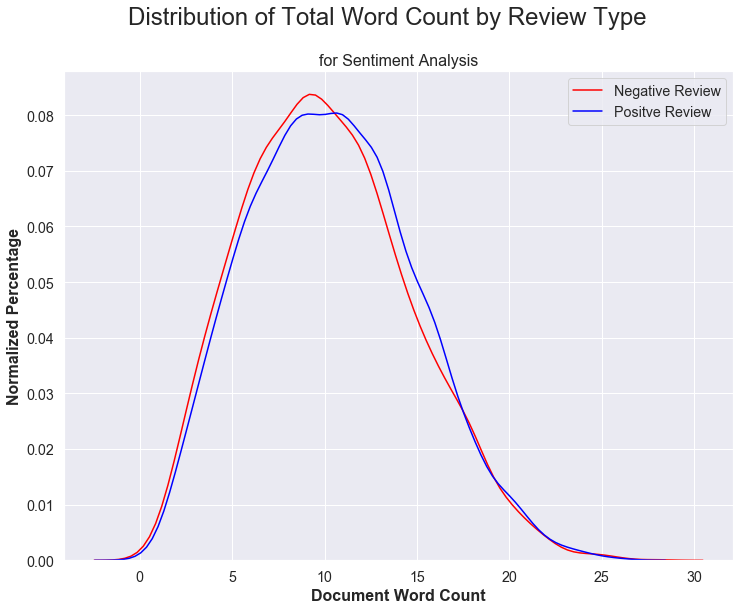

In [16]:
new_df = pd.DataFrame(X_train_counts.toarray(),columns=feature_names)
new_df["doc_word_count"]= new_df.sum(axis=1)
y = df[:10000]["Freshness"]
x_0 = new_df[y==0]["doc_word_count"]
x_1 = new_df[y==1]["doc_word_count"]
fig,ax = plt.subplots(figsize=(12,9))
sns.distplot(x_0, kde=True, color='red', hist = False, label = "Negative Review")
sns.distplot(x_1, kde=True, color='blue', hist = False, label = "Positve Review")
ax.legend()
ax.set_ylabel("Normalized Percentage",fontsize = 16, fontweight="bold")
ax.set_xlabel("Document Word Count",fontsize =16,fontweight="bold")
plt.title("for Sentiment Analysis", fontsize =16)
plt.suptitle("Distribution of Total Word Count by Review Type",fontsize=24)
plt.savefig("images/word_count_dist")
plt.show()


In [17]:
new_df.head()

10  100  101  105  11  110  118  12  120  13  ...  zola  zombie  zone  zoo  \
0   0    0    0    0   0    0    0   0    0   0  ...     0       0     0    0   
1   0    0    0    0   0    0    0   0    0   0  ...     0       0     0    0   
2   0    0    0    0   0    0    0   0    0   0  ...     0       0     0    0   
3   0    0    0    0   0    0    0   0    0   0  ...     0       0     0    0   
4   0    0    0    0   0    0    0   0    0   0  ...     0       0     0    0   

   zoolander  zoom  zuckers  zupan  zwick  doc_word_count  
0          0     0        0      0      0              11  
1          0     0        0      0      0               8  
2          0     0        0      0      0               6  
3          0     0        0      0      0              10  
4          0     0        0      0      0              15  

[5 rows x 10001 columns]

In [9]:
# from sklearn.feature_extraction.text import TfidfTransformer
# # just do term frequency at first, use_idf = False
# tf_transformer = TfidfTransformer(use_idf=False)
# tf_transformer.fit(X_train_counts)
# X_train_tf = tf_transformer.transform(X_train_counts)
# words_doi_tf = X_train_tf[doi]
# print("\nThese are the indices, words, and term frequencies in doc. {0}:".
#        format(doi))
# tf_lst = []
# for i in range(words_doi_tf.count_nonzero()):
#     word_index = words_doi_tf.indices[i]
#     word = count_vect.get_feature_names()[word_index]
#     count = words_doi_tf.data[i]
#     tf_lst.append(count)
#     print("{0:<6d}  {1:<12s}  {2:0.3f}".format(word_index, word, count))

# mag = np.sqrt(np.sum([tf**2 for tf in tf_lst]))
# print("\nThe magnitude of the tf vector for this document is {0:0.3f}".format(mag))
# print("It used the L2 norm.")

In [18]:
tfidf_transformer = TfidfTransformer(use_idf=True)
tfidf_transformer.fit(X_train_counts2)
X_train_tfidf2 = tfidf_transformer.transform(X_train_counts2)
# words_doi_tfidf = X_train_tfidf[doi] 
# print("\nThese are the indices, words, and tf-idf values in doc. {0}:".
#       format(doi)) 
# for i in range(words_doi_tfidf.count_nonzero()): 
#     word_index = words_doi_tfidf.indices[i] 
#     word = count_vect.get_feature_names()[word_index]
#     tfidf = words_doi_tfidf.data[i]
#     print("{0:<6d}  {1:<12s}  {2:0.3f}".format(word_index, word, tfidf))
X_train_tfidf2_arr = X_train_tfidf2.toarray()

In [11]:
# docs_new = ['God is love', 'OpenGL on the GPU is fast', 
#             'Two hands working can do more than a thousand clasped in prayer.']
# X_new_counts = count_vect.transform(docs_new)
# X_new_tfidf = tfidf_transformer.transform(X_new_counts)
# predictions = nb_model.predict(X_new_tfidf)
# print('Predictions')
# for doc, category in zip(docs_new, predictions):
#     print("{0} => {1}".format(doc, twenty_train.target_names[category]))

In [19]:
# 1. Create a set of documents.
documents = [' '.join(df_quick['Review']).lower() for row in df_quick]
print(documents)

[' manakamana doesn\'t answer any questions, yet makes its point: nepal, like the rest of our planet, is a picturesque but far from peaceable kingdom.  wilfully offensive and powered by a chest-thumping machismo, but it\'s good clean fun.  it would be difficult to imagine material more wrong for spade than lost & found.  despite the gusto its star brings to the role, it\'s hard to ride shotgun on hector\'s voyage of discovery.  if there was a good idea at the core of this film, it\'s been buried in an unsightly pile of flatulence jokes, dog-related bad puns and a ridiculous serial arson plot.  gleeson goes the hallmark channel route, damaging an intermittently curious entry in the time travel subgenre.  it was the height of satire in 1976: dark as hell, but patently absurd and surely nowhere close to objective reality. objective reality surpassed it somewhere in the jerry springer era.  everyone in "the comedian" deserves a better movie than "the comedian."  actor encourages grumpy chr

In [20]:
# 2. Create a set of tokenized documents.
docs = [word_tokenize(content) for content in documents]



In [21]:
# 3. Strip out stop words from each tokenized document.
stop = set(stopwords.words('english'))
docs = [[word for word in words if word not in stop] for words in docs]
docs

[['manakamana',
  "n't",
  'answer',
  'questions',
  ',',
  'yet',
  'makes',
  'point',
  ':',
  'nepal',
  ',',
  'like',
  'rest',
  'planet',
  ',',
  'picturesque',
  'far',
  'peaceable',
  'kingdom',
  '.',
  'wilfully',
  'offensive',
  'powered',
  'chest-thumping',
  'machismo',
  ',',
  "'s",
  'good',
  'clean',
  'fun',
  '.',
  'would',
  'difficult',
  'imagine',
  'material',
  'wrong',
  'spade',
  'lost',
  '&',
  'found',
  '.',
  'despite',
  'gusto',
  'star',
  'brings',
  'role',
  ',',
  "'s",
  'hard',
  'ride',
  'shotgun',
  'hector',
  "'s",
  'voyage',
  'discovery',
  '.',
  'good',
  'idea',
  'core',
  'film',
  ',',
  "'s",
  'buried',
  'unsightly',
  'pile',
  'flatulence',
  'jokes',
  ',',
  'dog-related',
  'bad',
  'puns',
  'ridiculous',
  'serial',
  'arson',
  'plot',
  '.',
  'gleeson',
  'goes',
  'hallmark',
  'channel',
  'route',
  ',',
  'damaging',
  'intermittently',
  'curious',
  'entry',
  'time',
  'travel',
  'subgenre',
  '.',
  

In [22]:
# Stemming / Lemmatization

# 1. Stem using both stemmers and the lemmatizer
porter = PorterStemmer()
snowball = SnowballStemmer('english')
wordnet = WordNetLemmatizer()
docs_porter = [[porter.stem(word) for word in words] for words in docs]
docs_snowball = [[snowball.stem(word) for word in words] for words in docs]
docs_wordnet = [[wordnet.lemmatize(word) for word in words] for words in docs]


In [18]:
for i in range(min(len(docs_porter[0]), len(docs_snowball[0]), len(docs_wordnet[0]))):
    p, s, w = docs_porter[0][i], docs_snowball[0][i], docs_wordnet[0][i]
    if len(set((p, s, w))) != 1:
        print("{}\t{}\t{}\t{}".format(docs[0][i], p, s, w))
p[::]
        


picturesque	picturesqu	picturesqu	picturesque
peaceable	peaceabl	peaceabl	peaceable
wilfully	wil	wil	wilfully
offensive	offens	offens	offensive
powered	power	power	powered
chest-thumping	chest-thump	chest-thump	chest-thumping
imagine	imagin	imagin	imagine
material	materi	materi	material
despite	despit	despit	despite
brings	bring	bring	brings
voyage	voyag	voyag	voyage
discovery	discoveri	discoveri	discovery
buried	buri	buri	buried
unsightly	unsightli	unsight	unsightly
flatulence	flatul	flatul	flatulence
dog-related	dog-rel	dog-rel	dog-related
ridiculous	ridicul	ridicul	ridiculous
goes	goe	goe	go
route	rout	rout	route
damaging	damag	damag	damaging
intermittently	intermitt	intermitt	intermittently
curious	curiou	curious	curious
entry	entri	entri	entry
subgenre	subgenr	subgenr	subgenre
satire	satir	satir	satire
patently	patent	patent	patently
surely	sure	sure	surely
nowhere	nowher	nowher	nowhere
objective	object	object	objective
reality	realiti	realiti	reality
objective	object	object	objec

danse	dans	dans	danse
dance	danc	danc	dance
going	go	go	going
filing	file	file	filing
installment	instal	instal	installment
evidence	evid	evid	evidence
nothing	noth	noth	nothing
noisy	noisi	noisi	noisy
jumbled	jumbl	jumbl	jumbled
sadistic	sadist	sadist	sadistic
thankfully	thank	thank	thankfully
praising	prais	prais	praising
threatened	threaten	threaten	threatened
ended	end	end	ended
really	realli	realli	really
enjoying	enjoy	enjoy	enjoying
looking	look	look	looking
clearly	clearli	clear	clearly
prepared	prepar	prepar	prepared
automotive	automot	automot	automotive
iconography	iconographi	iconographi	iconography
conclusion	conclus	conclus	conclusion
remains	remain	remain	remains
frustratingly	frustratingli	frustrat	frustratingly
middle	middl	middl	middle
dardennes	dardenn	dardenn	dardennes
fashioned	fashion	fashion	fashioned
accessible	access	access	accessible
relatable	relat	relat	relatable
suspense	suspens	suspens	suspense
exposes	expos	expos	expose
miserable	miser	miser	miserable
appe

filmmaker	filmmak	filmmak	filmmaker
crowe	crow	crow	crowe
handful	hand	hand	handful
stories	stori	stori	story
struggling	struggl	struggl	struggling
unifying	unifi	unifi	unifying
nowhere	nowher	nowher	nowhere
advance	advanc	advanc	advance
pretty	pretti	pretti	pretty
dizzying	dizzi	dizzi	dizzying
viewing	view	view	viewing
extricate	extric	extric	extricate
incredible	incred	incred	incredible
circumstance	circumst	circumst	circumstance
existence	exist	exist	existence
witty	witti	witti	witty
sense	sens	sens	sense
wicked	wick	wick	wicked
expense	expens	expens	expense
literary	literari	literari	literary
pretension	pretens	pretens	pretension
egotism	egot	egot	egotism
insecurity	insecur	insecur	insecurity
ill-advised	ill-advis	ill-advis	ill-advised
dalliances	dallianc	dallianc	dalliance
're	're	re	're
looking	look	look	looking
women	women	women	woman
feathered	feather	feather	feathered
assortment	assort	assort	assortment
vintage	vintag	vintag	vintage
sounding	sound	sound	sounding
musical	music	

fantastic	fantast	fantast	fantastic
somewhere	somewher	somewher	somewhere
several	sever	sever	several
compelling	compel	compel	compelling
stories	stori	stori	story
trying	tri	tri	trying
noticed	notic	notic	noticed
sinking	sink	sink	sinking
everything	everyth	everyth	everything
else	els	els	else
magical	magic	magic	magical
especially	especi	especi	especially
dumbledore	dumbledor	dumbledor	dumbledore
calculated	calcul	calcul	calculated
typical	typic	typic	typical
romantic	romant	romant	romantic
comedy	comedi	comedi	comedy
interactions	interact	interact	interaction
myers	myer	myer	myers
everyone	everyon	everyon	everyone
laughed	laugh	laugh	laughed
looking	look	look	looking
however	howev	howev	however
enjoying	enjoy	enjoy	enjoying
careful	care	care	careful
tirelessness	tireless	tireless	tirelessness
beginning	begin	begin	beginning
paintings	paint	paint	painting
appreciate	appreci	appreci	appreciate
someone	someon	someon	someone
haunted	haunt	haunt	haunted
house	hous	hous	house
invigorating

gifted	gift	gift	gifted
phillips	phillip	phillip	phillips
exercise	exercis	exercis	exercise
authority	author	author	authority
producer	produc	produc	producer
misgivings	misgiv	misgiv	misgiving
ignore	ignor	ignor	ignore
straining	strain	strain	straining
lightness	light	light	lightness
watchable	watchabl	watchabl	watchable
hardly	hardli	hard	hardly
anything	anyth	anyth	anything
resembling	resembl	resembl	resembling
tearjerker	tearjerk	tearjerk	tearjerker
boring	bore	bore	boring
hustle	hustl	hustl	hustle
little	littl	littl	little
skilled	skill	skill	skilled
exercise	exercis	exercis	exercise
creative	creativ	creativ	creative
misdirection	misdirect	misdirect	misdirection
quite	quit	quit	quite
delirious	deliri	deliri	delirious
nonsense	nonsens	nonsens	nonsense
disappoints	disappoint	disappoint	disappoints
missed	miss	miss	missed
opportunities	opportun	opportun	opportunity
mixed	mix	mix	mixed
quite	quit	quit	quite
convince	convinc	convinc	convince
kerry	kerri	kerri	kerry
clunkingly	clunkingli

undercooked	undercook	undercook	undercooked
sorely	sore	sore	sorely
lacking	lack	lack	lacking
trimmings	trim	trim	trimming
ready	readi	readi	ready
serve	serv	serv	serve
city	citi	citi	city
angry	angri	angri	angry
affected	affect	affect	affected
compromises	compromis	compromis	compromise
genre	genr	genr	genre
entertaining	entertain	entertain	entertaining
boring	bore	bore	boring
characters	charact	charact	character
aggressiveness	aggress	aggress	aggressiveness
stunning	stun	stun	stunning
piece	piec	piec	piece
'40s	'40	40s	'40s
everybody	everybodi	everybodi	everybody
absorbing	absorb	absorb	absorbing
filled	fill	fill	filled
mesmerizing	mesmer	mesmer	mesmerizing
ambiguity	ambigu	ambigu	ambiguity
indeed	inde	inde	indeed
'straw	'straw	straw	'straw
lurie	luri	luri	lurie
second-rate	second-r	second-r	second-rate
remake	remak	remak	remake
memorable	memor	memor	memorable
controversial	controversi	controversi	controversial
quite	quit	quit	quite
george	georg	georg	george
spending	spend	spend	spend

lycanthropic	lycanthrop	lycanthrop	lycanthropic
ability	abil	abil	ability
outside	outsid	outsid	outside
operating	oper	oper	operating
register	regist	regist	register
defined	defin	defin	defined
safeness	safe	safe	safeness
sturdily	sturdili	sturdili	sturdily
material	materi	materi	material
greatness	great	great	greatness
stylized	styliz	styliz	stylized
slightly	slightli	slight	slightly
perhaps	perhap	perhap	perhaps
overdosing	overdos	overdos	overdosing
flimsy	flimsi	flimsi	flimsy
whimsy	whimsi	whimsi	whimsy
fifty	fifti	fifti	fifty
becomes	becom	becom	becomes
painfully	pain	pain	painfully
basically	basic	basic	basically
together	togeth	togeth	together
sixty	sixti	sixti	sixty
damned	damn	damn	damned
extremely	extrem	extrem	extremely
offensive	offens	offens	offensive
consistently	consist	consist	consistently
wicked	wick	wick	wicked
conscience	conscienc	conscienc	conscience
really	realli	realli	really
billy	billi	billi	billy
achy	achi	achi	achy
breaky	breaki	breaki	breaky
brooding	brood	bro

history	histori	histori	history
likely	like	like	likely
baffle	baffl	baffl	baffle
novices	novic	novic	novice
feeling	feel	feel	feeling
curiously	curious	curious	curiously
unmoved	unmov	unmov	unmoved
slightly	slightli	slight	slightly
resentful	resent	resent	resentful
amazing	amaz	amaz	amazing
story	stori	stori	story
movingly	movingli	move	movingly
sentimentality	sentiment	sentiment	sentimentality
movies	movi	movi	movie
fine-tuned	fine-tun	fine-tun	fine-tuned
engaged	engag	engag	engaged
fascinating	fascin	fascin	fascinating
addressed	address	address	addressed
openly	openli	open	openly
characters	charact	charact	character
platonic	platon	platon	platonic
playful	play	play	playful
90s	90	90s	90
indie	indi	indi	indie
breaking	break	break	breaking
goes	goe	goe	go
evokes	evok	evok	evokes
visceral	viscer	viscer	visceral
sense	sens	sens	sense
jubilation	jubil	jubil	jubilation
immediately	immedi	immedi	immediately
connects	connect	connect	connects
us	us	us	u
movie	movi	movi	movie
setting	set	set	

office	offic	offic	office
asked	ask	ask	asked
terrible	terribl	terribl	terrible
luis	lui	lui	luis
cheerfully	cheer	cheer	cheerfully
satire	satir	satir	satire
repression	repress	repress	repression
erotic	erot	erot	erotic
fantasies	fantasi	fantasi	fantasy
running	run	run	running
saying	say	say	saying
genuinely	genuin	genuin	genuinely
unexpected	unexpect	unexpect	unexpected
purely	pure	pure	purely
irrelevance	irrelev	irrelev	irrelevance
landis	landi	landi	landis
macabre	macabr	macabr	macabre
enlightenment	enlighten	enlighten	enlightenment
starring	star	star	starring
andy	andi	andi	andy
serkis	serki	serki	serkis
entrepreneurial	entrepreneuri	entrepreneuri	entrepreneurial
furthering	further	further	furthering
cause	caus	caus	cause
science	scienc	scienc	science
goes	goe	goe	go
'worst	'worst	worst	'worst
quite	quit	quit	quite
possibly	possibl	possibl	possibly
unfortunately	unfortun	unfortun	unfortunately
story	stori	stori	story
seductive	seduct	seduct	seductive
manipulated	manipul	manipul	man

frontlines	frontlin	frontlin	frontlines
anyone	anyon	anyon	anyone
viability	viabil	viabil	viability
traditional	tradit	tradit	traditional
newsgathering	newsgath	newsgath	newsgathering
remains	remain	remain	remains
pressing	press	press	pressing
significance	signific	signific	significance
torture	tortur	tortur	torture
another	anoth	anoth	another
sacrificing	sacrif	sacrif	sacrificing
nuanced	nuanc	nuanc	nuanced
storytelling	storytel	storytel	storytelling
force	forc	forc	force
reducing	reduc	reduc	reducing
everyone	everyon	everyon	everyone
caricature	caricatur	caricatur	caricature
essentially	essenti	essenti	essentially
episode	episod	episod	episode
authentic	authent	authent	authentic
enlightening	enlighten	enlighten	enlightening
documentary	documentari	documentari	documentary
visually	visual	visual	visually
breathtaking	breathtak	breathtak	breathtaking
presenting	present	present	presenting
awe-inspiring	awe-inspir	awe-inspir	awe-inspiring
juxtaposed	juxtapos	juxtapos	juxtaposed
many	mani	

memorable	memor	memor	memorable
images	imag	imag	image
clarity	clariti	clariti	clarity
together	togeth	togeth	together
people	peopl	peopl	people
restaurants	restaur	restaur	restaurant
messy	messi	messi	messy
payne	payn	payn	payne
captures	captur	captur	capture
locations	locat	locat	location
honesty	honesti	honesti	honesty
enchanting	enchant	enchant	enchanting
irritating	irrit	irrit	irritating
juvenile	juvenil	juvenil	juvenile
oddly	oddli	odd	oddly
endearing	endear	endear	endearing
powerful	power	power	powerful
testimony	testimoni	testimoni	testimony
changes	chang	chang	change
people	peopl	peopl	people
voices	voic	voic	voice
pleasantly	pleasantli	pleasant	pleasantly
90-minute	90-minut	90-minut	90-minute
probably	probabl	probabl	probably
russell	russel	russel	russell
adapted	adapt	adapt	adapted
story	stori	stori	story
engaging	engag	engag	engaging
believable	believ	believ	believable
characters	charact	charact	character
meta-slasher	meta-slash	meta-slash	meta-slasher
toying	toy	toy	toying

waiting	wait	wait	waiting
revelations	revel	revel	revelation
really	realli	realli	really
going	go	go	going
exacerbated	exacerb	exacerb	exacerbated
artificiality	artifici	artifici	artificiality
everything	everyth	everyth	everything
sappy	sappi	sappi	sappy
romantic	romant	romant	romantic
fantasy	fantasi	fantasi	fantasy
proves	prove	prove	prof
movie	movi	movi	movie
based	base	base	based
inordinately	inordin	inordin	inordinately
little	littl	littl	little
romantic	romant	romant	romantic
chemistry	chemistri	chemistri	chemistry
're	're	re	're
female	femal	femal	female
absolutely	absolut	absolut	absolutely
nothing	noth	noth	nothing
conclusion	conclus	conclus	conclusion
likely	like	like	likely
beloved	belov	belov	beloved
anime	anim	anim	anime
movie	movi	movi	movie
struggle	struggl	struggl	struggle
unfolds	unfold	unfold	unfolds
predictable	predict	predict	predictable
nasty	nasti	nasti	nasty
technically	technic	technic	technically
polished	polish	polish	polished
tiresome	tiresom	tiresom	tiresome


unbelievable	unbeliev	unbeliev	unbelievable
story	stori	stori	story
believably	believ	believ	believably
everly	everli	ever	everly
abruptly	abruptli	abrupt	abruptly
'll	'll	ll	'll
fixed	fix	fix	fixed
messy	messi	messi	messy
movie	movi	movi	movie
charismatic	charismat	charismat	charismatic
earpiece	earpiec	earpiec	earpiece
calling	call	call	calling
movie	movi	movi	movie
force	forc	forc	force
effective	effect	effect	effective
comedic	comed	comed	comedic
less	less	less	le
compelling	compel	compel	compelling
examination	examin	examin	examination
aging	age	age	aging
fractured	fractur	fractur	fractured
family	famili	famili	family
dynamics	dynam	dynam	dynamic
funny	funni	funni	funny
romantic	romant	romant	romantic
comedy	comedi	comedi	comedy
despite	despit	despit	despite
predictable	predict	predict	predictable
stereotypes	stereotyp	stereotyp	stereotype
chemistry	chemistri	chemistri	chemistry
typical	typic	typic	typical
opposites	opposit	opposit	opposite
disjointed	disjoint	disjoint	disjointed


asks	ask	ask	asks
dizzying	dizzi	dizzi	dizzying
ferocious	feroci	feroci	ferocious
emotional	emot	emot	emotional
celebration	celebr	celebr	celebration
trailblazers	trailblaz	trailblaz	trailblazer
demanded	demand	demand	demanded
pic-a-nic	pic-a-n	pic-a-n	pic-a-nic
many	mani	mani	many
experience	experi	experi	experience
obvious	obviou	obvious	obvious
black-ops	black-op	black-op	black-ops
many	mani	mani	many
tricky	tricki	tricki	tricky
undercurrents	undercurr	undercurr	undercurrent
manage	manag	manag	manage
caved	cave	cave	caved
predictable	predict	predict	predictable
directions	direct	direct	direction
navigate	navig	navig	navigate
poetry	poetri	poetri	poetry
snarks	snark	snark	snarks
tony	toni	toni	tony
edition	edit	edit	edition
thanks	thank	thank	thanks
maturity	matur	matur	maturity
depicted	depict	depict	depicted
dignity	digniti	digniti	dignity
extemporaneous-seeming	extemporaneous-seem	extemporaneous-seem	extemporaneous-seeming
behavioral	behavior	behavior	behavioral
rarely	rare	rare	r

taste	tast	tast	taste
relied	reli	reli	relied
less	less	less	le
predictably	predict	predict	predictably
crudely	crude	crude	crudely
predictable	predict	predict	predictable
single	singl	singl	single
component	compon	compon	component
entirely	entir	entir	entirely
tedious	tediou	tedious	tedious
exercise	exercis	exercis	exercise
including	includ	includ	including
furious	furiou	furious	furious
spectacle	spectacl	spectacl	spectacle
overwhelming	overwhelm	overwhelm	overwhelming
two-dimensional	two-dimension	two-dimension	two-dimensional
characters	charact	charact	character
inconsistencies	inconsist	inconsist	inconsistency
overall	overal	overal	overall
stupidity	stupid	stupid	stupidity
'transformers	'transform	transform	'transformers
extinction	extinct	extinct	extinction
available	avail	avail	available
impossible	imposs	imposs	impossible
seduced	seduc	seduc	seduced
hard-edged	hard-edg	hard-edg	hard-edged
teenage	teenag	teenag	teenage
seeking	seek	seek	seeking
pleased	pleas	pleas	pleased
cutsie

sullenberger	sullenberg	sullenberg	sullenberger
another	anoth	anoth	another
milestone	mileston	mileston	milestone
story	stori	stori	story
story	stori	stori	story
plus	plu	plus	plus
minutes	minut	minut	minute
seraphine	seraphin	seraphin	seraphine
sympathetic	sympathet	sympathet	sympathetic
focus	focu	focus	focus
laborer	labor	labor	laborer
refined	refin	refin	refined
execution	execut	execut	execution
tribute	tribut	tribut	tribute
long-running	long-run	long-run	long-running
fairly	fairli	fair	fairly
character	charact	charact	character
realised	realis	realis	realised
balance	balanc	balanc	balance
talky	talki	talki	talky
leisurely	leisur	leisur	leisurely
baseball	basebal	basebal	baseball
appropriate	appropri	appropri	appropriate
uncannily	uncannili	uncannili	uncannily
evoke	evok	evok	evoke
feelings	feel	feel	feeling
awkwardness	awkward	awkward	awkwardness
alienation	alien	alien	alienation
excitement	excit	excit	excitement
teenager	teenag	teenag	teenager
conjures	conjur	conjur	conjures
susp

freudenthal	freudenth	freudenth	freudenthal
moving	move	move	moving
many	mani	mani	many
parental	parent	parent	parental
available	avail	avail	available
expecting	expect	expect	expecting
something	someth	someth	something
musical	music	music	musical
trilogy	trilog	trilog	trilogy
hungry	hungri	hungri	hungry
cinematic	cinemat	cinemat	cinematic
tradition	tradit	tradit	tradition
joyfully	joy	joy	joyfully
resurrected	resurrect	resurrect	resurrected
shocking	shock	shock	shocking
depressing	depress	depress	depressing
sensibilities	sensibl	sensibl	sensibility
memory	memori	memori	memory
devastating	devast	devast	devastating
beautifully	beauti	beauti	beautifully
residents	resid	resid	resident
represented	repres	repres	represented
story	stori	stori	story
dimensions	dimens	dimens	dimension
leaning	lean	lean	leaning
study	studi	studi	study
seeing	see	see	seeing
subordinating	subordin	subordin	subordinating
creating	creat	creat	creating
nature	natur	natur	nature
movie	movi	movi	movie
everything	every

idiosyncratic	idiosyncrat	idiosyncrat	idiosyncratic
qualities	qualiti	qualiti	quality
amis	ami	ami	amis
becomes	becom	becom	becomes
badly	badli	bad	badly
dated	date	date	dated
movie	movi	movi	movie
entire	entir	entir	entire
meticulously	meticul	meticul	meticulously
calibrated	calibr	calibr	calibrated
ambiguity	ambigu	ambigu	ambiguity
encouraging	encourag	encourag	encouraging
assumptions	assumpt	assumpt	assumption
characters	charact	charact	character
audience	audienc	audienc	audience
fully	fulli	fulli	fully
verify	verifi	verifi	verify
profoundly	profoundli	profound	profoundly
enraging	enrag	enrag	enraging
potentially	potenti	potenti	potentially
galvanizing	galvan	galvan	galvanizing
important	import	import	important
pieces	piec	piec	piece
nonfiction	nonfict	nonfict	nonfiction
mystery	mysteri	mysteri	mystery
science	scienc	scienc	science
existed	exist	exist	existed
despite	despit	despit	despite
interesting	interest	interest	interesting
degenerates	degener	degener	degenerate
obvious	obviou

continued	continu	continu	continued
family	famili	famili	family
togetherness	togeth	togeth	togetherness
casting	cast	cast	casting
turning	turn	turn	turning
original	origin	origin	original
comedies	comedi	comedi	comedy
considers	consid	consid	considers
something	someth	someth	something
less	less	less	le
romantic	romant	romant	romantic
enabler	enabl	enabl	enabler
presented	present	present	presented
probably	probabl	probabl	probably
conservative	conserv	conserv	conservative
heading	head	head	heading
aged	age	age	aged
recycled	recycl	recycl	recycled
sometimes	sometim	sometim	sometimes
register	regist	regist	register
tepidly	tepidli	tepid	tepidly
cause	caus	caus	cause
watching	watch	watch	watching
movie	movi	movi	movie
rarely	rare	rare	rarely
thinking	think	think	thinking
provokes	provok	provok	provokes
engage	engag	engag	engage
regularly	regularli	regular	regularly
perhaps	perhap	perhap	perhaps
familiarity	familiar	familiar	familiarity
bloodthirsty	bloodthirsti	bloodthirsti	bloodthirsty
ha

children	children	children	child
inhabitants	inhabit	inhabit	inhabitant
caretakers	caretak	caretak	caretaker
suppose	suppos	suppos	suppose
insurance-company	insurance-compani	insurance-compani	insurance-company
audition	audit	audit	audition
covered	cover	cover	covered
jones	jone	jone	jones
filled	fill	fill	filled
interesting	interest	interest	interesting
examine	examin	examin	examine
study	studi	studi	study
failure	failur	failur	failure
ultimately	ultim	ultim	ultimately
fascinating	fascin	fascin	fascinating
sometimes	sometim	sometim	sometimes
exhilarating	exhilar	exhilar	exhilarating
movie	movi	movi	movie
seems	seem	seem	seems
genuine	genuin	genuin	genuine
us	us	us	u
educational	educ	educ	educational
struggling	struggl	struggl	struggling
managing	manag	manag	managing
survive	surviv	surviv	survive
uninspired	uninspir	uninspir	uninspired
recycled	recycl	recycl	recycled
danny	danni	danni	danny
suggests	suggest	suggest	suggests
dramatic	dramat	dramat	dramatic
salinger	saling	saling	salinge

bastante	bastant	bastant	bastante
emily	emili	emili	emily
..family	..famili	..famili	..family
entertainment	entertain	entertain	entertainment
sense	sens	sens	sense
something	someth	someth	something
something	someth	someth	something
endure	endur	endur	endure
movie	movi	movi	movie
tangled	tangl	tangl	tangled
overstuffed	overstuf	overstuf	overstuffed
thinly-sketched	thinly-sketch	thinly-sketch	thinly-sketched
history	histori	histori	history
unlike	unlik	unlik	unlike
dollar-making	dollar-mak	dollar-mak	dollar-making
trouble	troubl	troubl	trouble
decadence	decad	decad	decadence
simply	simpli	simpli	simply
depressingly	depressingli	depress	depressingly
degeneratively	degen	degen	degeneratively
decadent	decad	decad	decadent
superficial	superfici	superfici	superficial
melodramatic	melodramat	melodramat	melodramatic
pleasure	pleasur	pleasur	pleasure
delivers-giving	delivers-giv	delivers-giv	delivers-giving
soulful	soul	soul	soulful
kindhearted	kindheart	kindheart	kindhearted
performance	perform

pieces	piec	piec	piece
occasionally-too-flashy	occasionally-too-flashi	occasionally-too-flashi	occasionally-too-flashy
otherwise	otherwis	otherwis	otherwise
pleasingly	pleasingli	pleas	pleasingly
twisted	twist	twist	twisted
loyalties	loyalti	loyalti	loyalty
revenge	reveng	reveng	revenge
bloody	bloodi	bloodi	bloody
redemption	redempt	redempt	redemption
disaster	disast	disast	disaster
community	commun	communiti	community
imagined	imagin	imagin	imagined
visually	visual	visual	visually
sumptuous	sumptuou	sumptuous	sumptuous
narrative	narr	narrat	narrative
cliffhanger	cliffhang	cliffhang	cliffhanger
ending	end	end	ending
indicate	indic	indic	indicate
everyone	everyon	everyon	everyone
involved	involv	involv	involved
series	seri	seri	series
going	go	go	going
seeping	seep	seep	seeping
consciousness	conscious	conscious	consciousness
lingering	linger	linger	lingering
really	realli	realli	really
getting	get	get	getting
flawed	flaw	flaw	flawed
value	valu	valu	value
delivers	deliv	deliv	delivers
me

filmmaker	filmmak	filmmak	filmmaker
clearly	clearli	clear	clearly
production	product	product	production
involved	involv	involv	involved
exactly	exactli	exact	exactly
movie	movi	movi	movie
remains	remain	remain	remains
fantasy	fantasi	fantasi	fantasy
enjoyable	enjoy	enjoy	enjoyable
direction	direct	direct	direction
try	tri	tri	try
denaturalize	denatur	denatur	denaturalize
ordinary	ordinari	ordinari	ordinary
lived	live	live	lived
nothing	noth	noth	nothing
everyone	everyon	everyon	everyone
unpleasant	unpleas	unpleas	unpleasant
mean-spirited	mean-spirit	mean-spirit	mean-spirited
movie	movi	movi	movie
becomes	becom	becom	becomes
repetitive	repetit	repetit	repetitive
pretty	pretti	pretti	pretty
quickly	quickli	quick	quickly
characters	charact	charact	character
lovable	lovabl	lovabl	lovable
detestable	detest	detest	detestable
're	're	re	're
lovable	lovabl	lovabl	lovable
detestable	detest	detest	detestable
defined	defin	defin	defined
minimal	minim	minim	minimal
endlessly	endlessli	endless	endl

emotion	emot	emot	emotion
watching	watch	watch	watching
story	stori	stori	story
non-traditional	non-tradit	non-tradit	non-traditional
family	famili	famili	family
trying	tri	tri	trying
together	togeth	togeth	together
disappears	disappear	disappear	disappears
'at	'at	at	'at
movie	movi	movi	movie
advertising	advertis	advertis	advertising
lying	lie	lie	lying
wonderful	wonder	wonder	wonderful
movie	movi	movi	movie
louis	loui	loui	louis
dreyfus	dreyfu	dreyfus	dreyfus
terrific	terrif	terrif	terrific
together	togeth	togeth	together
shriveled	shrivel	shrivel	shriveled
little	littl	littl	little
attention	attent	attent	attention
direction	direct	direct	direction
adaptation	adapt	adapt	adaptation
helped	help	help	helped
little	littl	littl	little
developed	develop	develop	developed
compelling	compel	compel	compelling
confounding	confound	confound	confounding
measure	measur	measur	measure
inelegant	ineleg	ineleg	inelegant
movie	movi	movi	movie
cyrus	cyru	cyrus	cyrus
performance	perform	perform	perfo

seriously	serious	serious	seriously
pageantry	pageantri	pageantri	pageantry
affecting	affect	affect	affecting
narrative	narr	narrat	narrative
despite	despit	despit	despite
sophistication	sophist	sophist	sophistication
performance	perform	perform	performance
escaping	escap	escap	escaping
remake	remak	remak	remake
trying	tri	tri	trying
convince	convinc	convinc	convince
forged	forg	forg	forged
called	call	call	called
movies	movi	movi	movie
addicted	addict	addict	addicted
making	make	make	making
value	valu	valu	value
watching	watch	watch	watching
expensive	expens	expens	expensive
disaster	disast	disast	disaster
slowly	slowli	slowli	slowly
odds	odd	odd	odds
lofty	lofti	lofti	lofty
ultimately	ultim	ultim	ultimately
compellingly	compellingli	compel	compellingly
series	seri	seri	series
based	base	base	based
impulse	impuls	impuls	impulse
slightly	slightli	slight	slightly
redeemed	redeem	redeem	redeemed
christmas	christma	christma	christmas
cheese	chees	chees	cheese
glory	glori	glori	glory
count

entertaining	entertain	entertain	entertaining
reminder	remind	remind	reminder
people	peopl	peopl	people
sometimes	sometim	sometim	sometimes
living	live	live	living
universe	univers	univers	universe
adventure	adventur	adventur	adventure
endure	endur	endur	endure
fully	fulli	fulli	fully
realized	realiz	realiz	realized
thanks	thank	thank	thanks
intelligence	intellig	intellig	intelligence
initial	initi	initi	initial
teasing	teas	teas	teasing
flirty	flirti	flirti	flirty
quality	qualiti	qualiti	quality
become	becom	becom	become
insufferably	insuffer	insuffer	insufferably
cloying	cloy	cloy	cloying
middle	middl	middl	middle
rendition	rendit	rendit	rendition
national	nation	nation	national
ceremony	ceremoni	ceremoni	ceremony
less	less	less	le
badly	badli	bad	badly
needle	needl	needl	needle
subtlety	subtleti	subtleti	subtlety
old-fashioned	old-fashion	old-fashion	old-fashioned
beautifully	beauti	beauti	beautifully
crafted	craft	craft	crafted
nature	natur	natur	nature
documentary	documentari	docu

watching	watch	watch	watching
impressive	impress	impress	impressive
performances	perform	perform	performance
've	've	ve	've
something	someth	someth	something
experimental	experiment	experiment	experimental
beautiful	beauti	beauti	beautiful
shortcomings	shortcom	shortcom	shortcoming
derivative	deriv	deriv	derivative
leanings	lean	lean	leaning
unique	uniqu	uniqu	unique
experience	experi	experi	experience
recycling	recycl	recycl	recycling
less	less	less	le
healing	heal	heal	healing
befall	befal	befal	befall
us	us	us	u
quite	quit	quit	quite
pretty	pretti	pretti	pretty
perhaps	perhap	perhap	perhaps
auteurists	auteurist	auteurist	auteurists
able	abl	abl	able
figure	figur	figur	figure
cinematic	cinemat	cinemat	cinematic
oeuvre	oeuvr	oeuvr	oeuvre
linklater	linklat	linklat	linklater
admirable	admir	admir	admirable
taking	take	take	taking
seriously	serious	serious	seriously
gruelling	gruell	gruell	gruelling
pitched	pitch	pitch	pitched
dead-eyed	dead-ey	dead-ey	dead-eyed
graduates	graduat	graduat

original	origin	origin	original
movie	movi	movi	movie
many	mani	mani	many
embarrassing	embarrass	embarrass	embarrassing
otherwise	otherwis	otherwis	otherwise
talented	talent	talent	talented
sexy	sexi	sexi	sexy
50-and-over	50-and-ov	50-and-ov	50-and-over
'ant-man	'ant-man	ant-man	'ant-man
typical	typic	typic	typical
sensory	sensori	sensori	sensory
taking	take	take	taking
introducing	introduc	introduc	introducing
stable	stabl	stabl	stable
superheroes	superhero	superhero	superheroes
intermittent	intermitt	intermitt	intermittent
pleasures	pleasur	pleasur	pleasure
nanny	nanni	nanni	nanny
affords	afford	afford	affords
provided	provid	provid	provided
chiefly	chiefli	chiefli	chiefly
passable	passabl	passabl	passable
destination	destin	destin	destination
family	famili	famili	family
square	squar	squar	square
contains	contain	contain	contains
many	mani	mani	many
pleasures	pleasur	pleasur	pleasure
single	singl	singl	single
extraordinary	extraordinari	extraordinari	extraordinary
always	alway	alway	

movie	movi	movi	movie
monotonous	monoton	monoton	monotonous
truly	truli	truli	truly
remarkable	remark	remark	remarkable
naivete	naivet	naivet	naivete
sophistication	sophist	sophist	sophistication
movie	movi	movi	movie
performance	perform	perform	performance
already	alreadi	alreadi	already
going	go	go	going
remembered	rememb	rememb	remembered
movie	movi	movi	movie
etched	etch	etch	etched
permanent	perman	perman	permanent
wonderfully	wonder	wonder	wonderfully
well-matched	well-match	well-match	well-matched
genre	genr	genr	genre
cinematic	cinemat	cinemat	cinematic
've	've	ve	've
starving	starv	starv	starving
'men	'men	men	'men
seemed	seem	seem	seemed
running	run	run	running
empty	empti	empti	empty
embodiment	embodi	embodi	embodiment
everything	everyth	everyth	everything
whereas	wherea	wherea	whereas
completely	complet	complet	completely
intriguing	intrigu	intrigu	intriguing
movie	movi	movi	movie
basis	basi	basi	basis
regrettably	regrett	regrett	regrettably
serious	seriou	serious	serious
c

nicolas	nicola	nicola	nicolas
taste	tast	tast	taste
elliptical	ellipt	ellipt	elliptical
storytelling	storytel	storytel	storytelling
interplanetary	interplanetari	interplanetari	interplanetary
tragedy	tragedi	tragedi	tragedy
arriving	arriv	arriv	arriving
something	someth	someth	something
nevins	nevin	nevin	nevins
nihilistic	nihilist	nihilist	nihilistic
fostered	foster	foster	fostered
nurturing	nurtur	nurtur	nurturing
family	famili	famili	family
resonates	reson	reson	resonates
rebels-with-a-cause	rebels-with-a-caus	rebels-with-a-caus	rebels-with-a-cause
novelty	novelti	novelti	novelty
post-production	post-product	post-product	post-production
preferable	prefer	prefer	preferable
seemed	seem	seem	seemed
capable	capabl	capabl	capable
audacious	audaci	audaci	audacious
rupture	ruptur	ruptur	rupture
suggests	suggest	suggest	suggests
shiny	shini	shini	shiny
by-the-numbers	by-the-numb	by-the-numb	by-the-numbers
less	less	less	le
energy	energi	energi	energy
piece-filled	piece-fil	piece-fil	piece-f

'.'

In [19]:
# Bag of words and TF-IDF

# 1. Create vocab, set of unique words
docs = docs_snowball # choose which stemmer/lemmatizer to use
vocab_set = set()
[[vocab_set.add(token) for token in tokens] for tokens in docs]
vocab = list(vocab_set)
vocab

# 2. Create word count vectors manually.
matrix = [[0] * len(vocab) for doc in docs]
vocab_dict = dict((word, i) for i, word in enumerate(vocab))
for i, words in enumerate(df.Review.values):
    for word in words:
        matrix[i][vocab_dict[word]] += 1


# 3. Create word count vector over the whole corpus.
cv = CountVectorizer(stop_words='english')
vectorized = cv.fit_transform(matrix)


# tfidf = TfidfTransformer(use_idf=True)
# tfidfed = tfidf.fit_transform(documents)
# print(tfidfed)
#X_matrix =tfidfed.todense()
#type(X_matrix)
#X_array = tfidfed.toarray()
#X_array
#X_array
# ans=np.asarray(X_matrix)
# len(ans)
print(vectorized)


KeyError: ' '

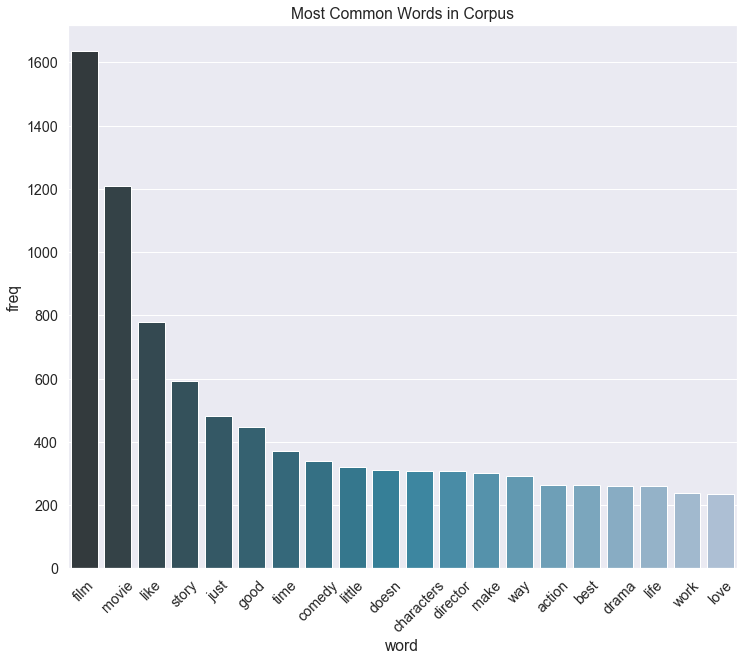

In [23]:
#cv = CountVectorizer()
#bow = cv.fit_transform(sr_clean)
word_freq = dict(zip(count_vect.get_feature_names(), np.asarray(X_train_counts.sum(axis=0)).ravel()))
word_counter = Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(20), columns = ['word', 'freq'])
fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(x="word", y="freq", data=word_counter_df, palette="PuBuGn_d", ax=ax)
plt.xticks(rotation=45)
plt.title("Most Common Words in Corpus")
plt.savefig("images/most_common_words")
plt.show();

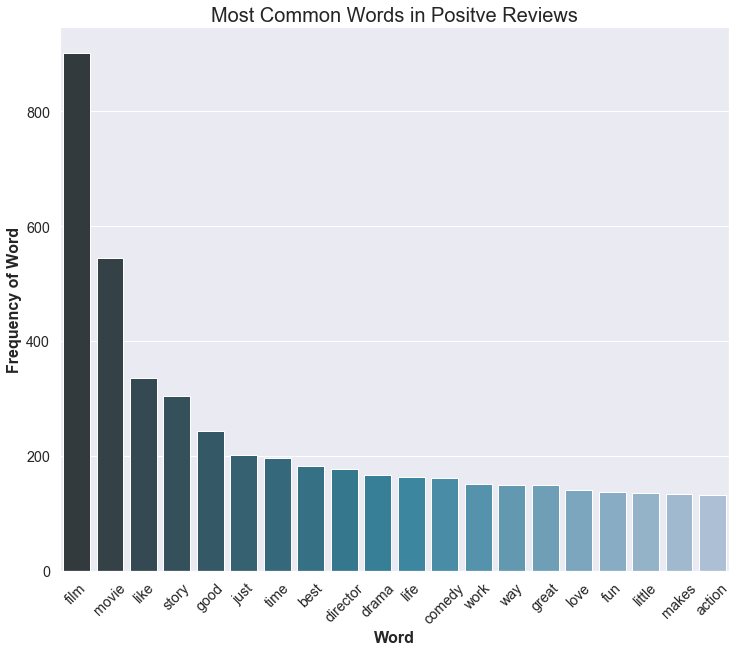

In [27]:
df_pos = df_quick[df_quick["Freshness"]==1]
X_train_counts_pos = count_vect.transform(df_pos["Review"].values)
word_freq_pos = dict(zip(count_vect.get_feature_names(), np.asarray(X_train_counts_pos.sum(axis=0)).ravel()))
word_counter_pos = Counter(word_freq_pos)
word_counter_df_pos = pd.DataFrame(word_counter_pos.most_common(20), columns = ['word', 'freq'])
df_neg = df_quick[df_quick["Freshness"]==0]
X_train_counts_neg = count_vect.transform(df_neg["Review"].values)
word_freq_neg = dict(zip(count_vect.get_feature_names(), np.asarray(X_train_counts_neg.sum(axis=0)).ravel()))
word_counter_neg = Counter(word_freq_neg)
word_counter_df_neg = pd.DataFrame(word_counter_neg.most_common(20), columns = ['word', 'freq'])

fig, ax = plt.subplots(figsize=(12, 10))
#plt.subplot(1,2,1)
sns.barplot(x="word", y="freq", data=word_counter_df_pos, palette="PuBuGn_d", ax=ax)
#plt.subplot(1,2,2)
#ax[0,1]= sns.barplot(x="word", y="freq", data=word_counter_df_neg, palette="PuBuGn_d", ax=ax)
plt.xlabel("Word", fontsize=16, fontweight ="bold")
plt.ylabel("Frequency of Word",fontsize = 16,fontweight="bold")
plt.xticks(rotation=45)
plt.title("Most Common Words in Positve Reviews",fontsize=20)
plt.savefig("images/most_common_words_pos")
plt.show();

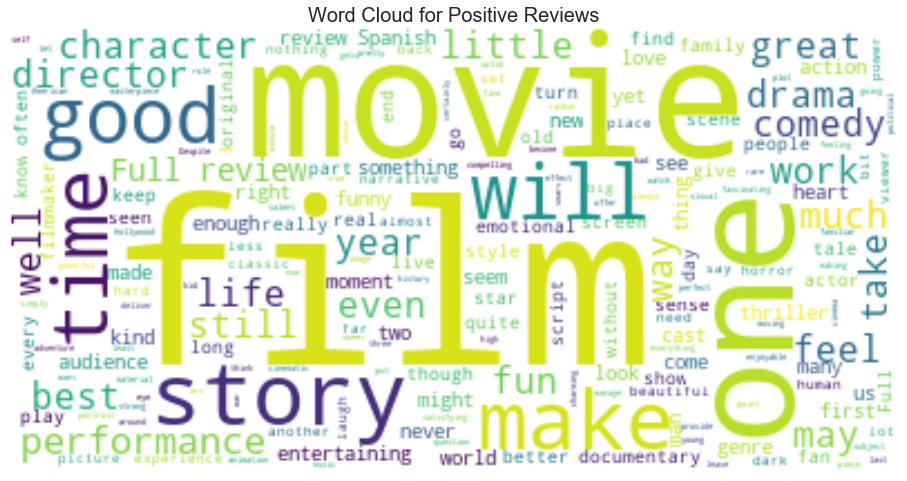

In [28]:
df_pos.head()
temp = df_pos["Review"].values
text= " ".join(review for review in temp)
stopwords = set(STOPWORDS)
wordcloud =WordCloud(stopwords=stopwords, background_color="white").generate(text)
fig = plt.figure(figsize = (16,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Positive Reviews", fontsize=20)
plt.savefig("images/word_cloud.png")
plt.show()

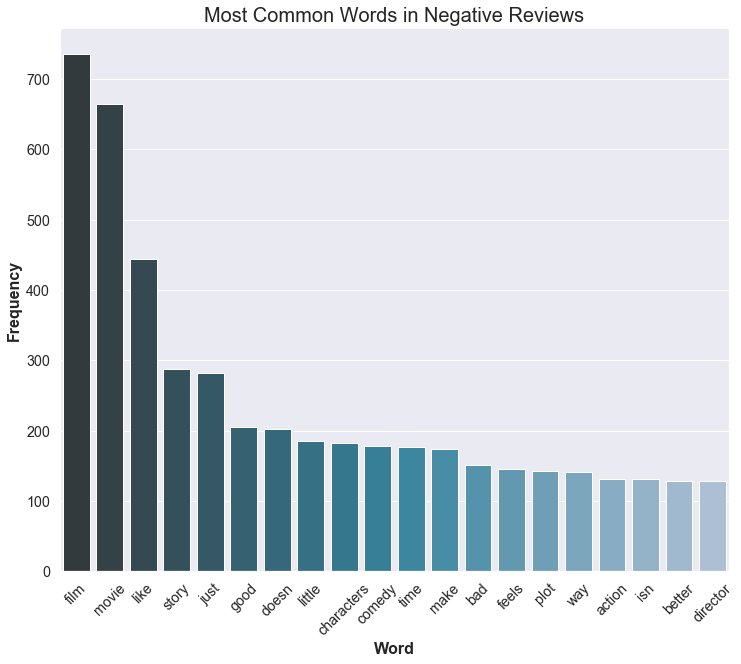

In [30]:
fig, ax = plt.subplots(figsize=(12, 10))
#plt.subplot(1,2,1)
sns.barplot(x="word", y="freq", data=word_counter_df_neg, palette="PuBuGn_d", ax=ax)
#plt.subplot(1,2,2)
#ax[0,1]= sns.barplot(x="word", y="freq", data=word_counter_df_neg, palette="PuBuGn_d", ax=ax)
plt.xticks(rotation=45)
plt.xlabel("Word",fontsize =16, fontweight="bold")
plt.ylabel("Frequency",fontsize =16, fontweight="bold")
plt.title("Most Common Words in Negative Reviews",fontsize=20)
plt.savefig("images/most_common_words_neg")
plt.show();

In [31]:
# print('\nTraining a Naive Bayes model.')
nb_model = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
y=df_quick["Freshness"].values
# print(y.shape)
# print(X_train_counts.shape)
#X_train_counts_arr = X_train_counts.toarray()
#print(X_train_counts_arr.shape)
nb_model.fit(X_train_tfidf2_arr, y)
type(X_train_tfidf2_arr)

numpy.ndarray

In [41]:
df_test = df[40000:42500]
X_test = df_test["Review"].values
X_test_counts = count_vect2.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
X_test_arr = X_test_tfidf.toarray()
#print(X_test_arr.shape)
#X_test_std= scaler.fit_transform(X_temp)
y_test = df_test["Freshness"].values
#print(X_test_counts.shape)
print(X_test_arr.shape)
nb_model.score(X_train_tfidf2_arr,y)

(2500, 16335)


0.9128

In [33]:
nb_model.score(X_test_arr, y_test)

0.7396

In [34]:
df_quick.values
transformer = TfidfTransformer()
X_train_tfidf = transformer.fit_transform(X_train_counts)
X_train_tfidf_arr = X_train_tfidf.toarray()
X_train_tfidf_arr.shape
y.shape,y_test.shape
X_test_tfidf = transformer.fit_transform(X_test_counts)
X_test_tfidf_arr = X_test_tfidf.toarray()
X_test_tfidf_arr.shape

(2500, 16335)

In [72]:
print('\nTraining a Naive Bayes model.')
nb_model_tfidf = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
y=df_quick["Freshness"].values
print(y.shape)
print(X_train_counts.shape)
nb_model_tfidf.fit(X_train_tfidf_arr, y)


Training a Naive Bayes model.
(10000,)
(10000, 20208)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [35]:
nb_model_tfidf.score(X_test_tfidf_arr, y_test)

NameError: name 'nb_model_tfidf' is not defined

In [19]:
input_dim = X_train_counts.shape[1]  # Number of features
model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [20]:
model.compile(optimizer="adam",loss='binary_crossentropy', 
                metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                72180     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 72,191
Trainable params: 72,191
Non-trainable params: 0
_________________________________________________________________


In [21]:
print(X_train_counts_arr.shape)
print(y.shape)
print(X_test_arr.shape)
print(y_test.shape)
history = model.fit(X_train_counts_arr, y,
                      epochs=10,
                      verbose=True,
                      validation_data=(X_test_arr, y_test),
                      batch_size=30)

(10000, 7217)
(10000,)
(1000, 7217)
(1000,)
Instructions for updating:
Use tf.cast instead.
Train on 10000 samples, validate on 1000 samples
Epoch 1/10
10000/10000 [==============================] - 5s 494us/step - loss: 0.6387 - acc: 0.6639 - val_loss: 0.5805 - val_acc: 0.7200
Epoch 2/10
10000/10000 [==============================] - 3s 301us/step - loss: 0.4688 - acc: 0.8063 - val_loss: 0.5430 - val_acc: 0.7210
Epoch 3/10
10000/10000 [==============================] - 3s 311us/step - loss: 0.3605 - acc: 0.8522 - val_loss: 0.5500 - val_acc: 0.7270
Epoch 4/10
10000/10000 [==============================] - 3s 304us/step - loss: 0.2919 - acc: 0.8847 - val_loss: 0.5730 - val_acc: 0.7220
Epoch 5/10
10000/10000 [==============================] - 3s 317us/step - loss: 0.2422 - acc: 0.9092 - val_loss: 0.5989 - val_acc: 0.7250
Epoch 6/10
10000/10000 [==============================] - 3s 309us/step - loss: 0.2019 - acc: 0.9306 - val_loss: 0.6431 - val_acc: 0.7230
Epoch 7/10
10000/10000 [=======

In [22]:
loss, accuracy = model.evaluate(X_train_counts_arr, y, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test_arr, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


10000/10000 [==============================] - 1s 67us/step
Training Accuracy: 0.9841
Testing Accuracy:  0.7200


In [23]:
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.suptitle("Neural Network model",fontsize=24)
    plt.title('Training and validation loss')
    plt.legend()

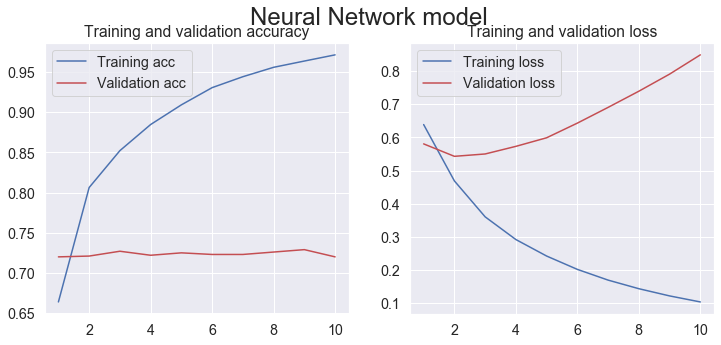

In [24]:
plot_history(history)

In [27]:
X_train_std.shape

(10000, 7217)

In [ ]:
X_train_std[:,0].std()

In [36]:
# standardize data : use X_train_std

pca = PCA(n_components=1000) #pca object
X_pca = pca.fit_transform(X_train_std) # from 5000 features to 30 PCA features

print("\nData after PCA into 2 components")
print("PC1\tPC2")
for i in range(50):
    print("{0:0.1f}\t{1:0.1f}".format(X_pca[i,0], X_pca[i,1]))
X_pca.shape
pca.components_
#X_train_std.shape


Data after PCA into 2 components
PC1	PC2
-0.1	-0.1
-0.1	-0.1
-0.1	0.0
-0.1	-0.1
-0.2	-0.2
-0.2	-0.2
-0.1	0.1
-0.1	0.0
-0.1	0.0
-0.1	-0.1
-0.1	-0.3
-0.1	-0.1
-0.1	-0.0
-0.2	-0.4
-0.0	-0.1
-0.1	-0.0
-0.0	-0.1
0.0	-0.1
-0.0	0.0
-0.1	-0.2
-0.1	-0.2
-0.1	-0.2
-0.1	-0.3
-0.1	-0.6
-0.1	-0.2
-0.1	-0.3
0.0	-0.1
-0.1	-0.4
-0.1	-0.1
0.3	-0.3
0.3	-0.4
-0.1	-0.3
-0.1	-0.1
-0.1	-0.0
-0.1	-0.1
-0.0	0.3
-0.1	-0.1
-0.1	-0.3
-0.1	-0.1
11.4	-0.4
-0.0	-0.6
-0.1	-0.2
-0.1	-0.2
-0.0	-0.0
-0.1	-0.2
-0.1	-0.1
-0.0	-0.2
-0.2	-0.4
-0.1	-0.3
-0.1	-0.2


array([[-4.22567118e-04, -2.50715548e-04, -1.08396778e-04, ...,
        -1.79259080e-04, -1.49005670e-04, -1.75478174e-04],
       [-1.00922050e-03, -7.26656339e-04, -2.49221795e-04, ...,
        -4.52087058e-04, -2.42574272e-04, -1.01493473e-03],
       [-3.39264351e-05, -1.08433585e-03, -8.52298491e-05, ...,
        -2.42684806e-04, -3.78564276e-05, -1.90275533e-04],
       ...,
       [ 9.14069757e-03, -1.61080090e-03,  2.39869382e-03, ...,
         1.31154025e-02, -1.66866316e-02,  1.52627448e-03],
       [ 2.61152186e-03,  4.16352705e-03,  1.62634999e-02, ...,
         1.09079606e-02,  1.08219253e-02,  6.62237155e-03],
       [ 1.32237098e-02, -3.47718003e-03,  2.10435030e-02, ...,
        -1.94147340e-03, -2.38436931e-03, -8.40693169e-04]])

In [ ]:
# components= pca.components_
# max_pca1 = components.argsort(desc)[:10]



(10000,)

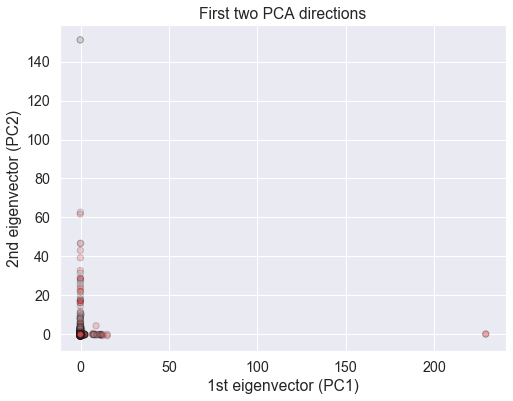

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40, alpha=0.2)
ax.set_title("First two PCA directions")
ax.set_xlabel("1st eigenvector (PC1)")
ax.set_ylabel("2nd eigenvector (PC2)");
X_pca[:,1].shape

In [38]:
evr = pca.explained_variance_ratio_
print(sum(evr))
print(evr)
top_pca_evr = np.argsort(evr)[::-1]
print(evr[top_pca_evr][:5])
total_variance = np.sum(pca.explained_variance_)
cum_variance_of_2 = np.sum(pca.explained_variance_[0:2])
prop_var_expl_2 = cum_variance_of_2/total_variance
print(prop_var_expl_2)
print("The 2 principal components explain {0:0.1f}%"
      " of the variance in the original data.".format(prop_var_expl_2*100))

0.3364730626685874
[0.00107834 0.00073934 0.00066597 0.00065804 0.00059228 0.00058132
 0.00057343 0.00056905 0.00055715 0.00055038 0.00054804 0.00054324
 0.00054026 0.00053206 0.00052902 0.00052116 0.00051663 0.0005118
 0.00051059 0.00050663 0.00050362 0.00050018 0.00049979 0.00049829
 0.00049504 0.00049373 0.00049197 0.00049052 0.00048938 0.00048798
 0.00048731 0.00048558 0.00048502 0.00048396 0.00048387 0.00048195
 0.0004806  0.00047939 0.00047777 0.00047751 0.00047569 0.00047513
 0.00047315 0.00047289 0.00047257 0.00047154 0.00047074 0.00046856
 0.00046796 0.00046734 0.00046653 0.00046616 0.00046593 0.0004635
 0.00046265 0.00046193 0.00046098 0.00045978 0.0004595  0.00045812
 0.0004566  0.00045624 0.00045545 0.00045412 0.00045357 0.00045254
 0.00045147 0.00045111 0.00045047 0.0004493  0.00044884 0.00044765
 0.00044734 0.00044679 0.00044623 0.00044509 0.00044488 0.00044272
 0.00044229 0.00044188 0.00044134 0.0004405  0.00044    0.0004394
 0.00043891 0.00043765 0.00043716 0.00043664 0

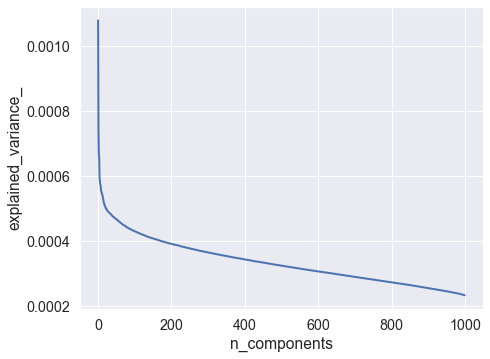

In [39]:
pca.fit(X_train_std)

plt.figure(1, figsize=(8, 6))
plt.clf()
plt.axes([.2, .2, .7, .7])
num_components = pca.n_components_
ind = np.arange(num_components)
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_');

In [ ]:
pca.explained_variance_ratio_

[0.00540226]


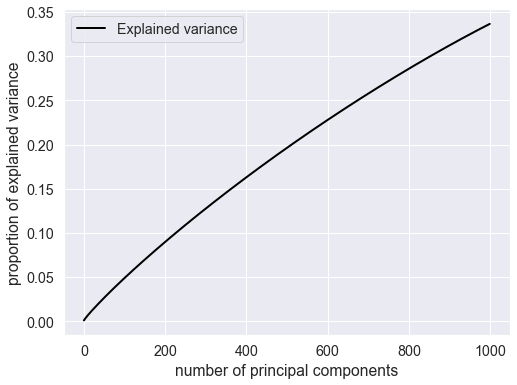

In [40]:
total_variance = np.sum(pca.explained_variance_)
cum_variance = np.cumsum(pca.explained_variance_)
prop_var_expl = cum_variance/total_variance
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(pca.explained_variance_ratio_.cumsum(), color = 'black', linewidth=2, label='Explained variance')
#ax.axhline(0.9, label='90% goal', linestyle='--', linewidth=1)
ax.set_ylabel('proportion of explained variance')
ax.set_xlabel('number of principal components')
ax.legend();
print(prop_var_expl[1:2])

In [ ]:
def plot_rt_embedding(ax, X, y, title=None):
     """Plot an embedding of the mnist dataset onto a plane.
 
     Parameters
     ----------
     ax: matplotlib.axis object
       The axis to make the scree plot on.
 
     X: numpy.array, shape (n, 2)
       A two dimensional array containing the coordinates of the embedding.
 
     y: numpy.array
       The labels of the datapoints.  Should be digits.
 
     title: str
       A title for the plot.
     """
     x_min, x_max = np.min(X, 0), np.max(X, 0)
     X = (X - x_min) / (x_max - x_min)
     ax.axis('off')
     ax.patch.set_visible(False)
     for i in range(X.shape[0]):
         plt.text(X[i, 0], X[i, 1], 
                  str(y[i]), 
                  color=plt.cm.Set1(y[i]), 
                  fontdict={'weight': 'bold', 'size': 12})
 
     ax.set_xticks([]), 
     ax.set_yticks([])
     ax.set_ylim([-0.1,1.1])
     ax.set_xlim([-0.1,1.1])
 
     if title is not None:
         ax.set_title(title, fontsize=16)
            
    

In [ ]:
X_pca = pca.fit_transform(X_train_std)
fig , ax = plt.subplots()
plot_rt_embedding(ax, X_pca, y, title=None)
#X_pca.shape
     

In [156]:
count_vect2 = CountVectorizer(lowercase=True, tokenizer=None, stop_words='english',
                             analyzer='word', ngram_range=(1,3), max_df=1.0, min_df=1,
                             max_features=None)
X_train_counts2 = count_vect2.fit_transform(df_quick.Review.values)
X_train_counts2_arr = X_train_counts2.toarray()
X_train_counts2_arr.shape

(10000, 204500)

In [157]:
feature_names = count_vect2.get_feature_names()
feature_names

['000',
 '000 feet',
 '000 feet orbit',
 '007',
 '007 action',
 '007 action featuring',
 '08',
 '08 east',
 '08 east bucharest',
 '10',
 '10 10',
 '10 11',
 '10 11 year',
 '10 79',
 '10 79 type',
 '10 decades',
 '10 decades know',
 '10 especially',
 '10 especially girls',
 '10 goyas',
 '10 goyas spain',
 '10 lists',
 '10 lists standard',
 '10 manner',
 '10 manner simply',
 '10 minutes',
 '10 minutes director',
 '10 minutes dragged',
 '10 minutes film',
 '10 minutes long',
 '10 minutes old',
 '10 recreates',
 '10 recreates gradual',
 '10 times',
 '10 year',
 '10 year buildup',
 '10 year old',
 '10 years',
 '10 years ago',
 '10 years later',
 '10 yuma',
 '10 yuma generate',
 '10 yuma makes',
 '100',
 '100 boring',
 '100 days',
 '100 days solitude',
 '100 mins',
 '100 mins overplayed',
 '100 minutes',
 '100 minutes movie',
 '100 minutes nonstop',
 '100 minutes offline',
 '100 minutes shoot',
 '100 original',
 '100 original work',
 '100 streets',
 '100 streets used',
 '100 year',
 '100 yea

In [158]:
print('\nTraining a Naive Bayes model.')
nb_model2 = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
y=df_quick["Freshness"].values
nb_model2.fit(X_train_counts2_arr, y)


Training a Naive Bayes model.


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [159]:
df_test = df[40000:41000]
X_test = df_test["Review"].values
X_test_counts = count_vect2.transform(X_test)
print(X_test_counts.shape)
X_test_counts_arr = X_test_counts.toarray()
print(X_test_counts_arr.shape)
# X_test_counts_arr = X_test_counts.toarray()
# X_test_counts_arr.shape
# #X_test_std= scaler.fit_transform(X_temp)
y_test = df_test["Freshness"].values
print(y_test.shape)
# X_test_count_arr.shape

(1000, 204500)
(1000, 204500)
(1000,)


In [160]:
nb_model2.score(X_test_counts_arr, y_test)

0.725